## Homework 3

### 3.  Chapter 5
We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

(b) What are the advantages and disadvantages of k-fold crossvalidation

relative to:

i. The validation set approach?

ii. LOOCV?

#### a) 
K-fold cross validation is implemented by taking k random samples of the data set, making sure they are not overlapped. For each sample set, it acts as a validation send and the rest as a training set. For example if we use k=4, the data set is going to be divided by 4 samples, where 1 is the validation and the other 3 are the training set. This repeats for each until the 4 samples are used as a validation set. After this, the test error is the average MSE estimates.

#### b) 
##### i.
The validation set approach is simpler to use and to understand, as you are basically spliting data into two sets. One disadvantage is that the MSE estimates or the error estimates are only tested to one validation set and cannot be compared with other samples. It also can lead to overestimate the test error rate.

##### ii.
The LOOCV is more complicated to implement than the validation set approach since the model has to be fitted several times. It consists in splitting data into two, but only one observation is used  as a validation set while the others remain as the training set. Its also important to say that it has a lower bias than the k-fold cross validation, but less accurate error estimates.


### 8. Chapter 5
We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:
> set .seed (1)
> x=rnorm (100)
> y=x-2* x^2+ rnorm (100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

(b) Create a scatterplot of X against Y . Comment on what you find.

(c) Set a random seed, and then compute the LOOCV errors that

result from fitting the following four models using least squares:

i. Y = β0 + β1X + 

ii. Y = β0 + β1X + β2X^2 + 

iii. Y = β0 + β1X + β2X^2 + β3X^3 + 

iv. Y = β0 + β1X + β2X^2 + β3X^3 + β4X^4 + .

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

(f) Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

In [11]:
# a) generate data set
set.seed(42) 
x=rnorm(100) 
y=x-2*x^2+rnorm(100)

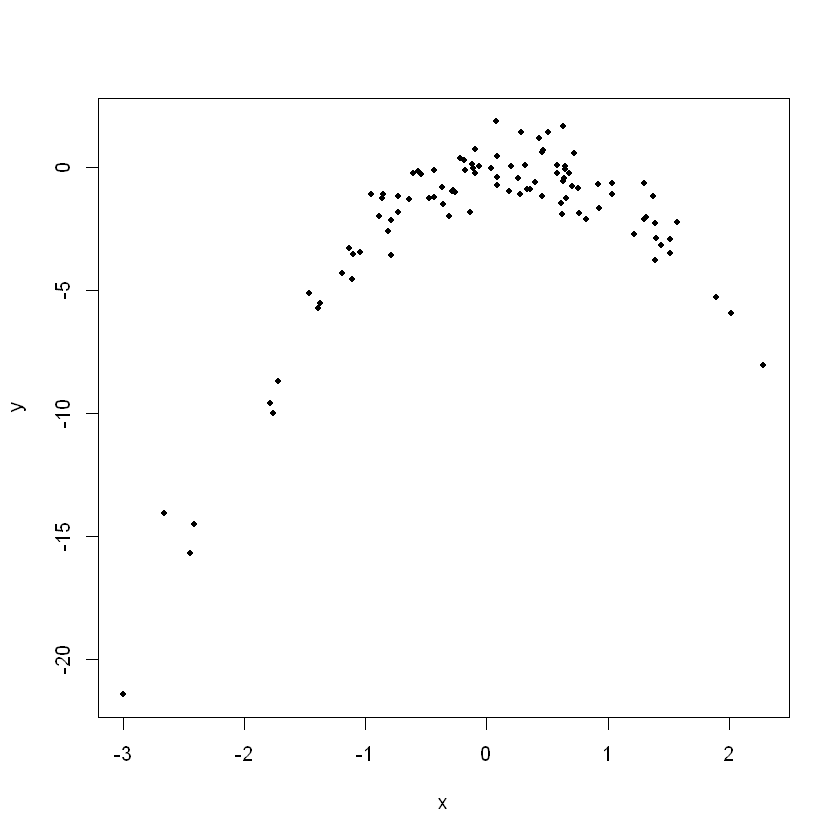

In [12]:
#b) plot
plot(x,y,pch=20) #its a concave function, since it is a quadratic equation. 

In [15]:
df<-data.frame(y,x)

In [14]:
# i.
library(boot)

set.seed(42)
fit = glm(y ~ x)
cv.glm(df, fit)$delta

[1] 10.96593 10.96032

In [17]:
# ii.

set.seed(42)
fit = glm(y ~ poly(x,2))
cv.glm(df, fit)$delta

[1] 0.8858076 0.8853962

In [18]:
# iii.

set.seed(42)
fit = glm(y ~ poly(x,3))
cv.glm(df, fit)$delta

[1] 0.9087144 0.9081673

In [19]:
# iv.

set.seed(42)
fit = glm(y ~ poly(x,4))
cv.glm(df, fit)$delta

[1] 0.9644779 0.9634323

In [20]:
# d
#i.

set.seed(92)
fit = glm(y ~ x)
cv.glm(df, fit)$delta

[1] 10.96593 10.96032

In [21]:
# ii.

set.seed(92)
fit = glm(y ~ poly(x,2))
cv.glm(df, fit)$delta

[1] 0.8858076 0.8853962

In [22]:
# iii.

set.seed(92)
fit = glm(y ~ poly(x,3))
cv.glm(df, fit)$delta

[1] 0.9087144 0.9081673

In [23]:
# iv.

set.seed(92)
fit = glm(y ~ poly(x,4))
cv.glm(df, fit)$delta

[1] 0.9644779 0.9634323

In this case we have the same results, even if we change the seed because LOOCV does the validation for a single observation.

e) THe model with the lowest LOOCV error is the quadratic, since it follows the same degree polynomial as the true form of y.

In [24]:
#f) 
summary(fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6837  -0.5941  -0.0534   0.5654   2.8583  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.20424    0.09144 -24.105   <2e-16 ***
poly(x, 4)1  19.51809    0.91443  21.345   <2e-16 ***
poly(x, 4)2 -30.12292    0.91443 -32.942   <2e-16 ***
poly(x, 4)3   0.27121    0.91443   0.297    0.767    
poly(x, 4)4   1.15503    0.91443   1.263    0.210    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.8361751)

    Null deviance: 1369.191  on 99  degrees of freedom
Residual deviance:   79.437  on 95  degrees of freedom
AIC: 272.77

Number of Fisher Scoring iterations: 2


We can see that the main significance are for the first and second degree of x which leads into a the quadratic form being the best fit. This is in accordance to the LOOCV results.

### 1. Chapter 6
We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2, . . . , p predictors. Explain your answers:

(a) Which of the three models with k predictors has the smallest
training RSS?

(b) Which of the three models with k predictors has the smallest
test RSS?

(c) True or False:

i. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by forward stepwise selection.

ii. The predictors in the k-variable model identified by backward
stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection.

iii. The predictors in the k-variable model identified by backward
stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection.

iv. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by backward stepwise selection.

v. The predictors in the k-variable model identified by best
subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.

a) From the three models with k predictors, the best subset selection has the smallest trainingn RSS since the other methods defines models with path dependency.

b) From the same three models, the best subset selection has the samallest test RSS since it uses more models.

c)
i. true

ii. true

iii. false

iv. false

v. false

### 9. Chapter 6 
In this exercise, we will predict the number of applications received
using the other variables in the College data set.

(a) Split the data set into a training set and a test set.

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

(c) Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.

(d) Fit a lasso model on the training set, with λ chosen by crossvalidation.
Report the test error obtained, along with the number
of non-zero coefficient estimates.

(e) Fit a PCR model on the training set, with M chosen by crossvalidation.
Report the test error obtained, along with the value
of M selected by cross-validation.

(f) Fit a PLS model on the training set, with M chosen by crossvalidation.
Report the test error obtained, along with the value
of M selected by cross-validation.

(g) Comment on the results obtained. How accurately can we predict
the number of college applications received? Is there much
difference among the test errors resulting from these five approaches?

In [42]:
library(ISLR)

#a)
set.seed(42)
train<-sample(nrow(College),nrow(College)*0.7)
test<-c(1:nrow(College))[!c(1:nrow(College))%in%train]

train<-College[train,]
test<-College[test,]
nrow(train)
nrow(test)

[1] 543

[1] 234

In [43]:
head(train)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
William Jewell College,Yes,663,547,315,32,67,1279,75,10060,2970,500,2600,74,80,11.2,19,7885,59
Baker University,Yes,602,483,206,21,47,958,466,8620,4100,400,2250,58,68,11.0,21,6136,65
University of West Florida,No,1558,1254,472,20,57,3754,2477,6172,3994,541,1387,83,87,23.4,12,8488,53
Columbia College,Yes,737,614,242,21,67,968,237,10425,3975,500,1500,61,77,14.7,34,8693,76
Christopher Newport University,No,883,766,428,3,37,2910,1749,7860,4750,525,1889,80,82,21.2,16,4639,48
St. Martin's College,Yes,191,165,63,5,25,494,574,11550,4270,300,500,43,77,14.5,8,9209,40


In [45]:
#b)
fit<-lm(Apps~.,data=train)
#summary(fit)

fit_pred=predict(fit,test)

mean((test$Apps-fit_pred)^2)

[1] 680349.5

In [63]:
#c)
library(glmnet)

x_train <- model.matrix(Apps~.,data=train)

grid = 10^seq(2, -3, by = -.1)
fit_ridge = cv.glmnet(x_train,train$Apps, alpha=0, lambda=grid, thresh=1e-12)
lambda_best = fit_ridge$lambda.min
lambda_best

[1] 0.001

In [64]:
x_test <- model.matrix(Apps~.,data=test)
ridge_pred = predict(fit_ridge, newx=x_test, s=lambda_best)
mean((test$Apps - ridge_pred)^2)

#the RSS is a little smaller than in OLS

[1] 680337.3

In [65]:
#d)
fit_lasso = cv.glmnet(x_train,train$Apps, alpha=1, lambda=grid, thresh=1e-12)
lambda_best = fit_lasso$lambda.min
lambda_best

lasso_pred = predict(fit_lasso, newx=x_test, s=lambda_best)
mean((test$Apps - lasso_pred)^2)

#the RSS is a little smaller than in Ridge

[1] 0.001

[1] 680327.3

In [68]:
lasso <- glmnet(x_train, train$Apps, alpha=1)
predict(lasso, s=lambda.best, type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -347.67697894
(Intercept)    .         
PrivateYes  -532.81526329
Accept         1.66219728
Enroll        -1.21558048
Top10perc     61.52751658
Top25perc    -20.58788019
F.Undergrad    0.08776007
P.Undergrad    0.01096350
Outstate      -0.09506419
Room.Board     0.13345111
Books         -0.17267925
Personal       0.14306592
PhD           -9.32798659
Terminal      -0.80794226
S.F.Ratio     13.03066761
perc.alumni   -1.14114039
Expend         0.07480815
Grad.Rate      9.95371379

In [71]:
#install.packages("pls")

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mserrano\AppData\Local\Temp\RtmpoL7nNL\downloaded_packages


[1] 1227182

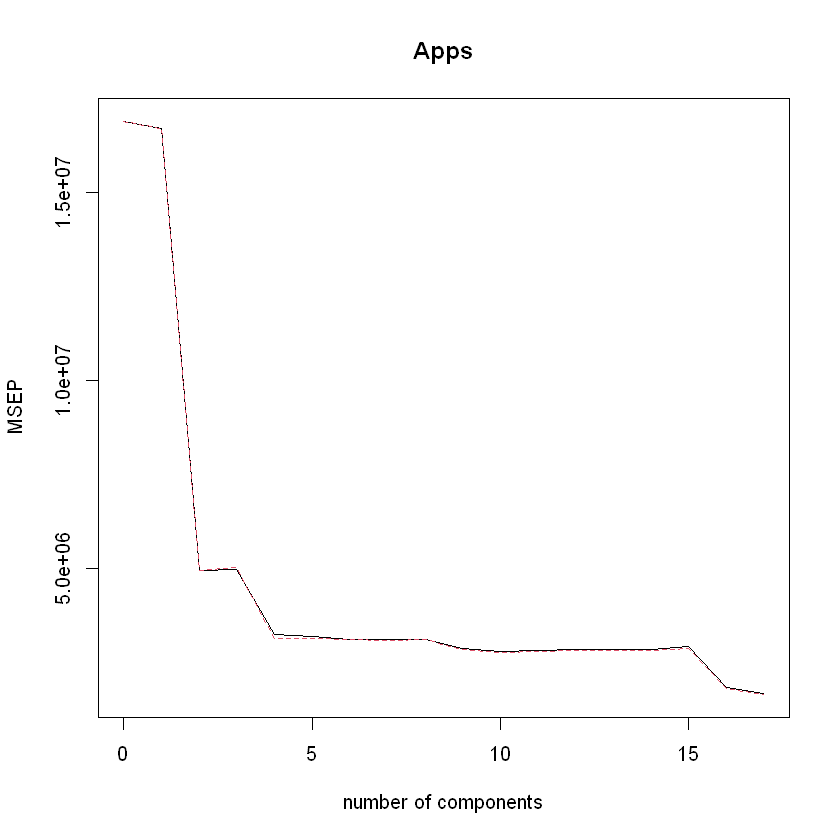

In [73]:
#e)
library(pls)

fit_pcr = pcr(Apps~., data=train, scale=T, validation="CV")
validationplot(fit_pcr, val.type="MSEP")

pcr_pred = predict(fit_pcr, test, ncomp=10)
mean((test$Apps - pcr_pred)^2)

#the error is higher 

[1] 661659.2

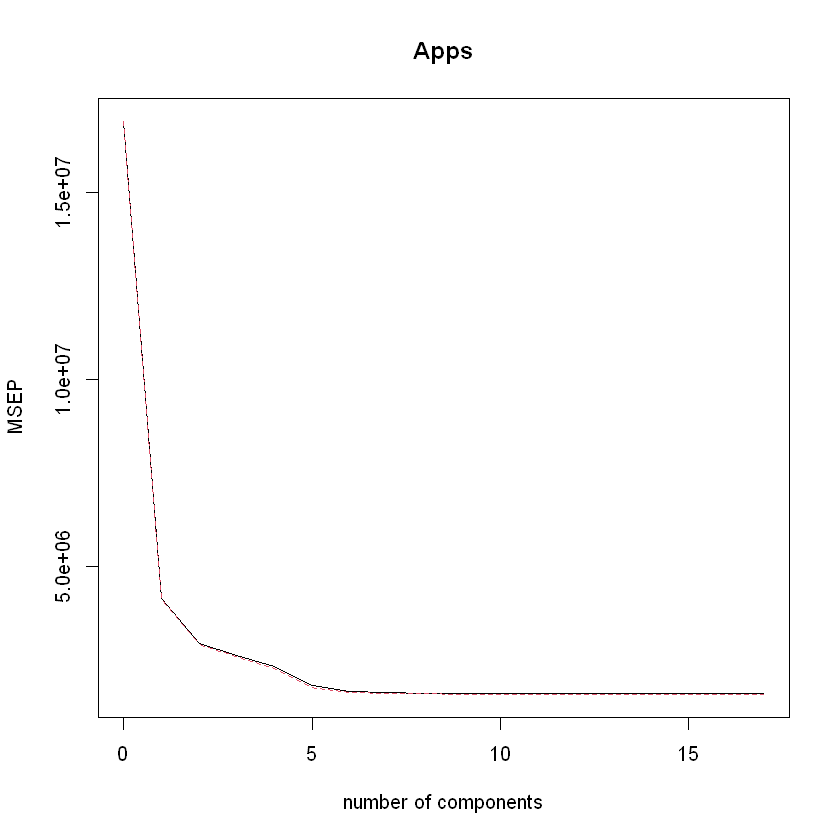

In [76]:
#f)

fit_psl = plsr(Apps~., data=train, scale=T, validation="CV")
validationplot(fit_psl, val.type="MSEP")

psl_pred = predict(fit_psl, test, ncomp=10)
mean((test$Apps - psl_pred)^2)

#error is lower than other models

g)

Checking the errors obtained from each model we can say that the error for the PLS model is the lowest from the applied models. 
Eventhough, we can say that the error differences between most of the models are not very significant.

For the  PCR the error is the highest by much more significant, so in this case, basically we could use most of the models to predict except for the PCR.


### 9. Chapter 7
This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration
in parts per 10 million) from the Boston data. We will treat
dis as the predictor and nox as the response.

(a) Use the poly() function to fit a cubic polynomial regression to
predict nox using dis. Report the regression output, and plot
the resulting data and polynomial fits.

(b) Plot the polynomial fits for a range of different polynomial
degrees (say, from 1 to 10), and report the associated residual
sum of squares.

(c) Perform cross-validation or another approach to select the optimal
degree for the polynomial, and explain your results.

(d) Use the bs() function to fit a regression spline to predict nox
using dis. Report the output for the fit using four degrees of
freedom. How did you choose the knots? Plot the resulting fit.

(e) Now fit a regression spline for a range of degrees of freedom, and
plot the resulting fits and report the resulting RSS. Describe the
results obtained.

(f) Perform cross-validation or another approach in order to select
the best degrees of freedom for a regression spline on this data.
Describe your results.

In [77]:
#a)
library(MASS)

lm_fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(lm_fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


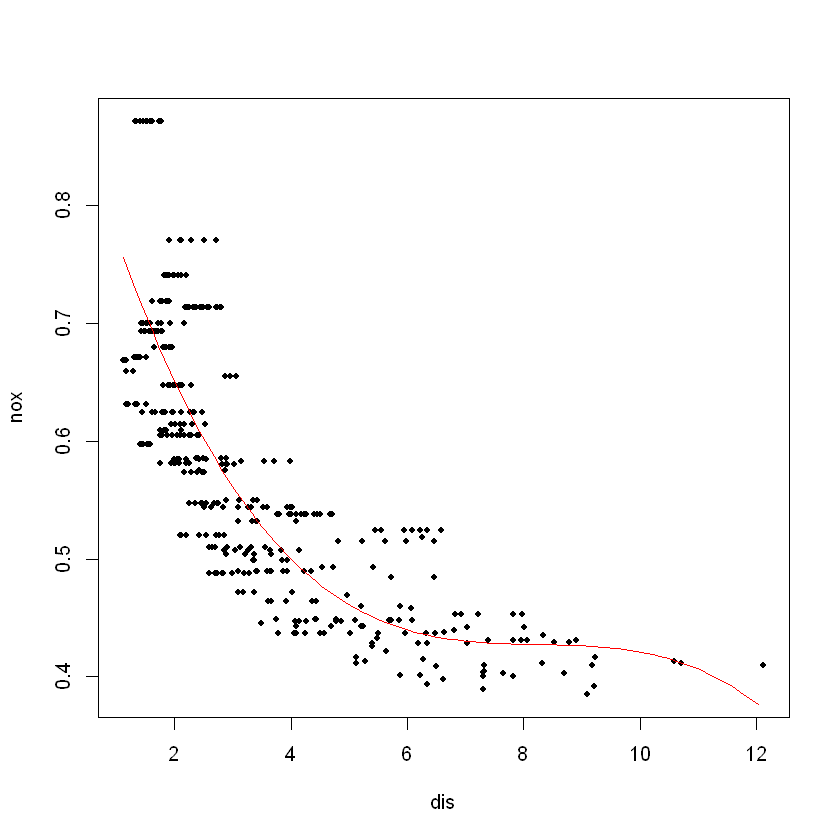

In [85]:
dislim = range(Boston$dis)

dis_grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm_pred = predict(lm_fit, list(dis = dis_grid))

plot(nox ~ dis, data = Boston, pch=20)
lines(dis_grid, lm_pred, col = "red")

It shows that all terms are significant. The plot also shows a curve that fits the data very good.

In [87]:
#b)
results <- rep(NA, 10)
for (i in 1:10) {
    lm_fit = lm(nox ~ poly(dis, i), data = Boston)
    results[i] = sum(lm_fit$residuals^2)
}
results

#the RSS goes down as the polynomials go higher

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

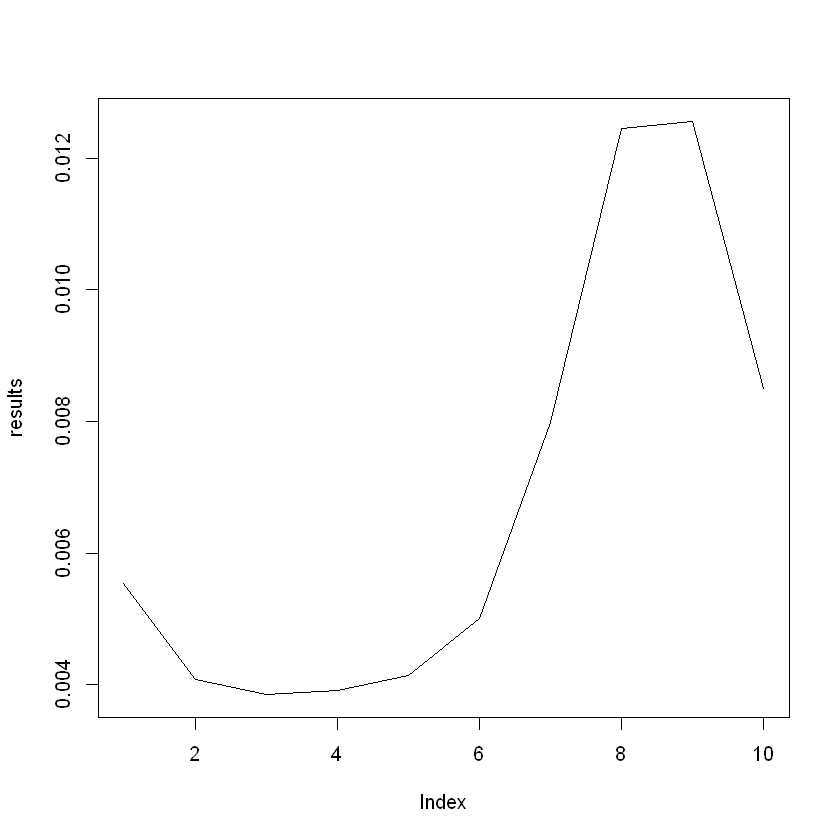

In [103]:
#c)
library(boot)

results = rep(NA, 10)
for (i in 1:10) {
    glm_fit = glm(nox ~ poly(dis, i), data = Boston)
    results[i] = cv.glm(Boston, glm_fit, K = 10)$delta[2]
}
plot(results, type = "l")


We can see that for higher degrees the error start increasing, specially from the degree 3 or 4. 

In [91]:
#d)
library(splines)
splines_fit = lm(nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)
summary(splines_fit)


Call:
lm(formula = nox ~ ns(dis, df = 4, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.123145 -0.040555 -0.008866  0.022473  0.193180 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.744773   0.007315 101.808   <2e-16 ***
ns(dis, df = 4, knots = c(4, 7, 11))1 -0.285665   0.016569 -17.241   <2e-16 ***
ns(dis, df = 4, knots = c(4, 7, 11))2 -0.329754   0.035477  -9.295   <2e-16 ***
ns(dis, df = 4, knots = c(4, 7, 11))3 -0.574141   0.044965 -12.769   <2e-16 ***
ns(dis, df = 4, knots = c(4, 7, 11))4 -0.109542   0.054935  -1.994   0.0467 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06178 on 501 degrees of freedom
Multiple R-squared:  0.718,	Adjusted R-squared:  0.7158 
F-statistic:   319 on 4 and 501 DF,  p-value: < 2.2e-16


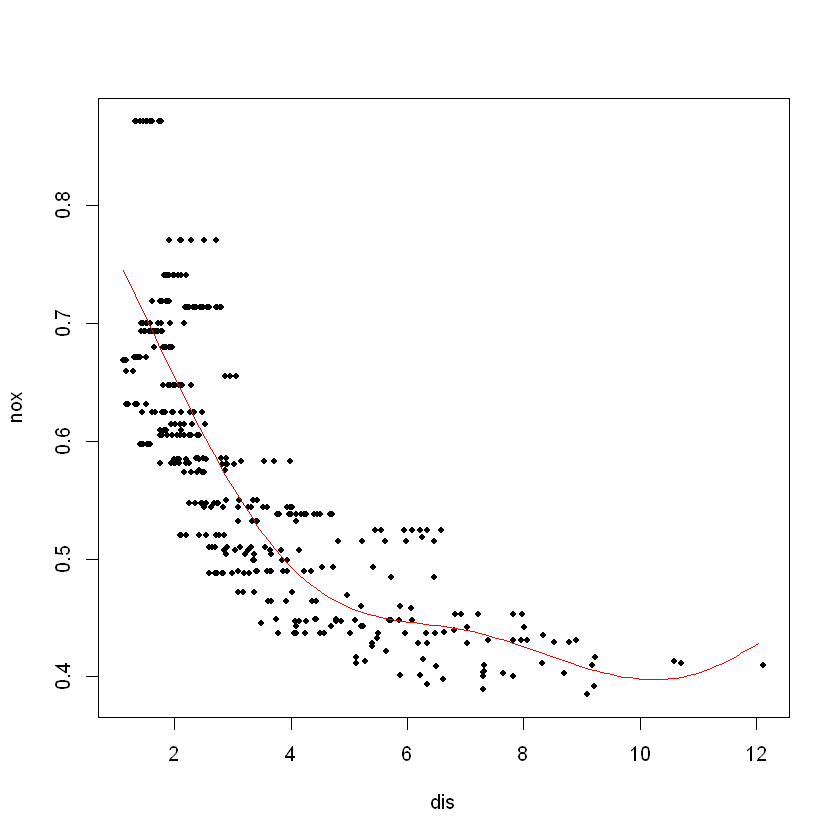

In [94]:
spline_pred = predict(splines_fit, list(dis = dis_grid))

plot(nox ~ dis, data = Boston, pch=20)
lines(dis_grid, spline_pred, col = "red")

All the coefficients are significant and the spline seems to fit the data very well.

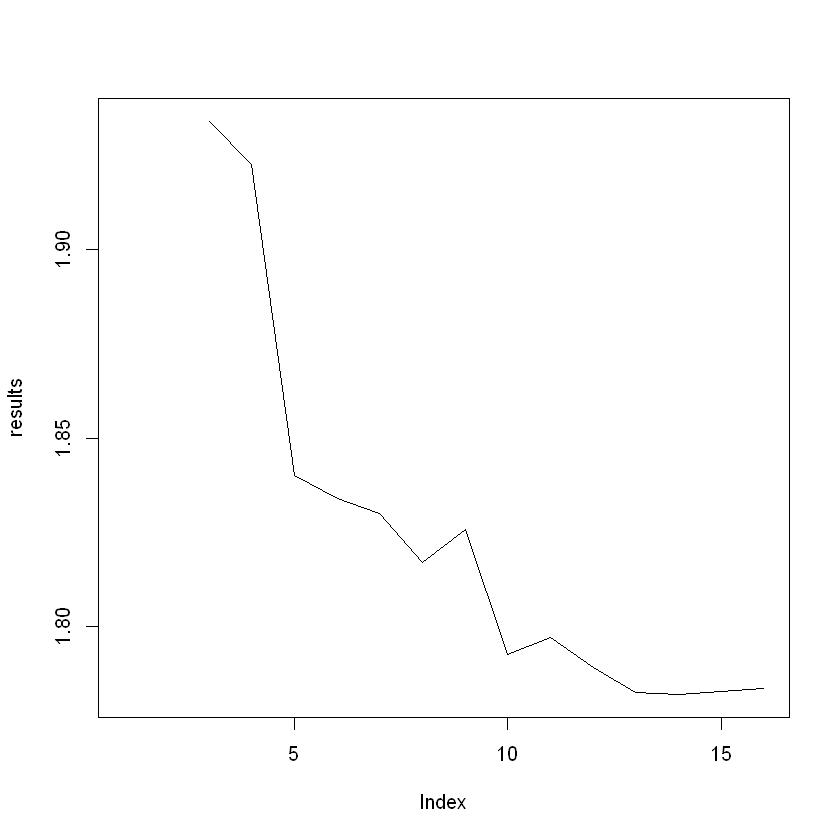

In [104]:
#e)
results = rep(NA, 16)
for (i in 3:16) {
    splines_fit = lm(nox ~ bs(dis, df = i), data = Boston)
    results[i] = sum(splines_fit$residuals^2)
}

plot(results,type="l")

The RSS decrease as the df go down until df=14.

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2759), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2759), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(

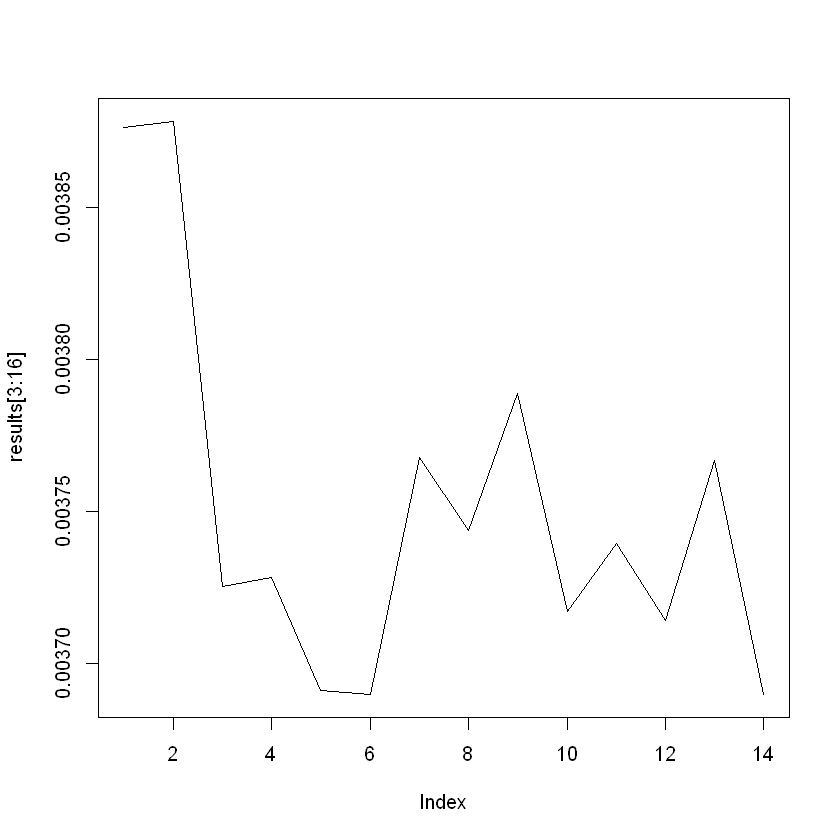

In [107]:
#f)
results = rep(NA, 16)
for (i in 3:16) {
    splines_fit = glm(nox ~ bs(dis, df = i), data = Boston)
    results[i] = cv.glm(Boston, splines_fit, K = 10)$delta[2]
}

plot(results[3:16], type = "l")


The minimum value is obtained when df=6

### 10. Chapter 7 
This question relates to the College data set.

(a) Split the data into a training set and a test set. Using out-of-state
tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.

(b) Fit a GAM on the training data, using out-of-state tuition as
the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.

(c) Evaluate the model obtained on the test set, and explain the
results obtained.

(d) For which variables, if any, is there evidence of a non-linear
relationship with the response?

In [110]:
#install.packages("leaps")

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mserrano\AppData\Local\Temp\RtmpoL7nNL\downloaded_packages


In [132]:
library(leaps)

#a)

set.seed(42)
train<-sample(nrow(College),nrow(College)*0.75)
test<-c(1:nrow(College))[!c(1:nrow(College))%in%train]

train<-College[train,]
test<-College[test,]

In [133]:
fit <- regsubsets(Outstate ~ ., data = train, nvmax = 17, method = "forward")
reg_summary = summary(fit)

[1] 825.69611 403.15607 243.16581 111.67301  65.23534  49.85373  46.11326
 [8]  28.81666  24.16452  18.49962  16.12687  14.28518  13.32448  12.99178
[15]  14.01633  16.00160  18.00000

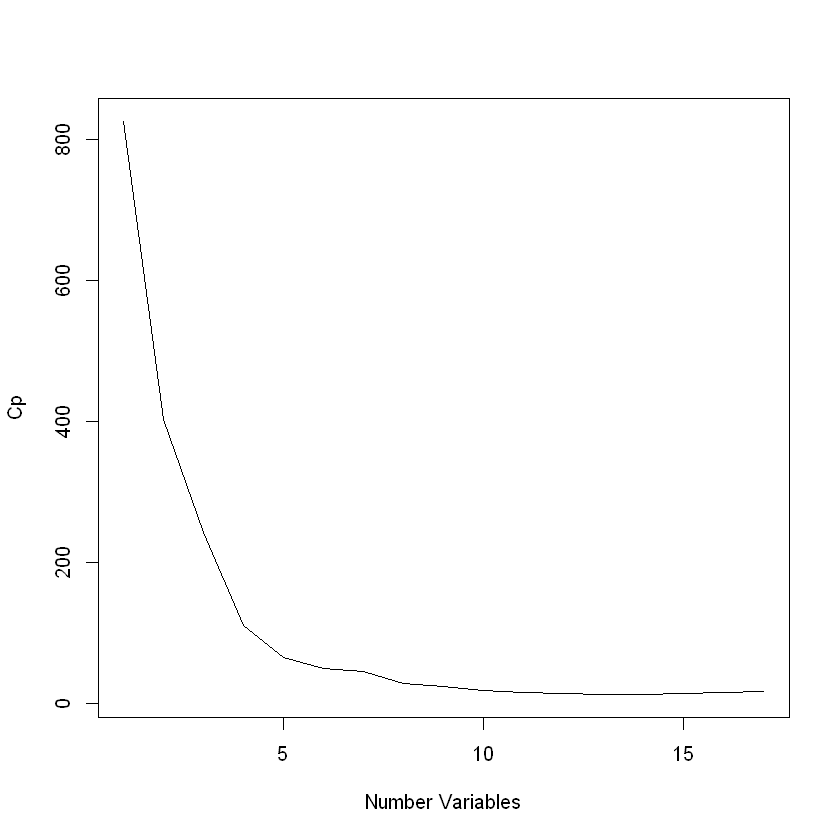

[1] -348.9327 -552.1869 -651.0746 -748.5150 -784.9163 -794.6967 -793.7629
 [8] -806.0391 -806.2403 -807.5345 -805.5839 -803.1249 -799.7879 -795.8194
[15] -790.4586 -784.1073 -777.7425

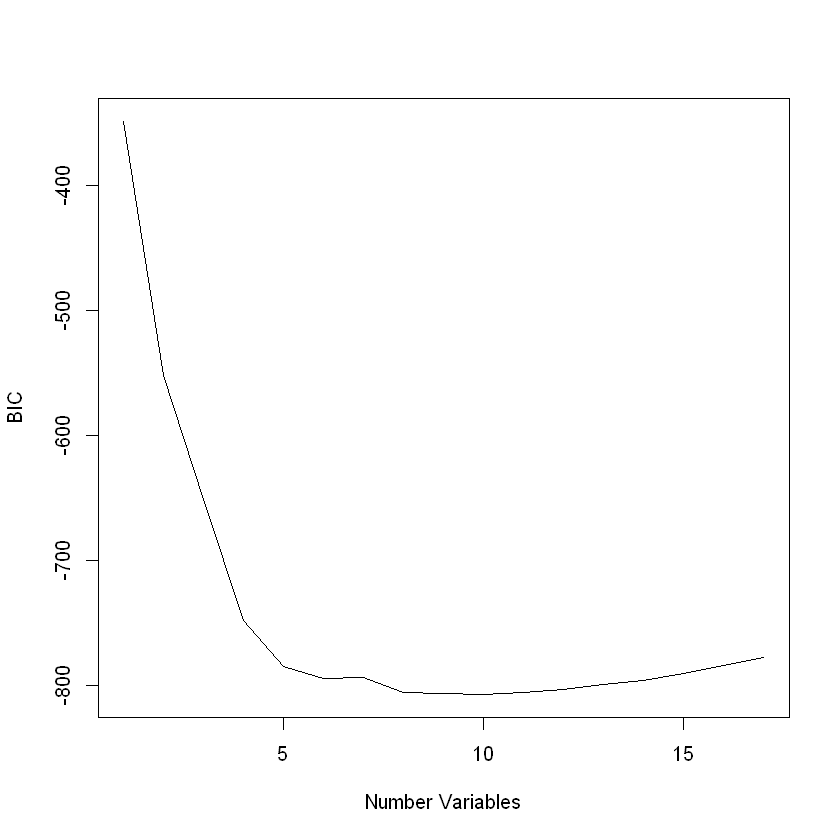

[1] 0.4618920 0.6239914 0.6856549 0.7365507 0.7547909 0.7610857 0.7628931
 [8] 0.7699670 0.7721506 0.7747362 0.7760467 0.7771543 0.7779210 0.7784440
[15] 0.7784358 0.7780494 0.7776565

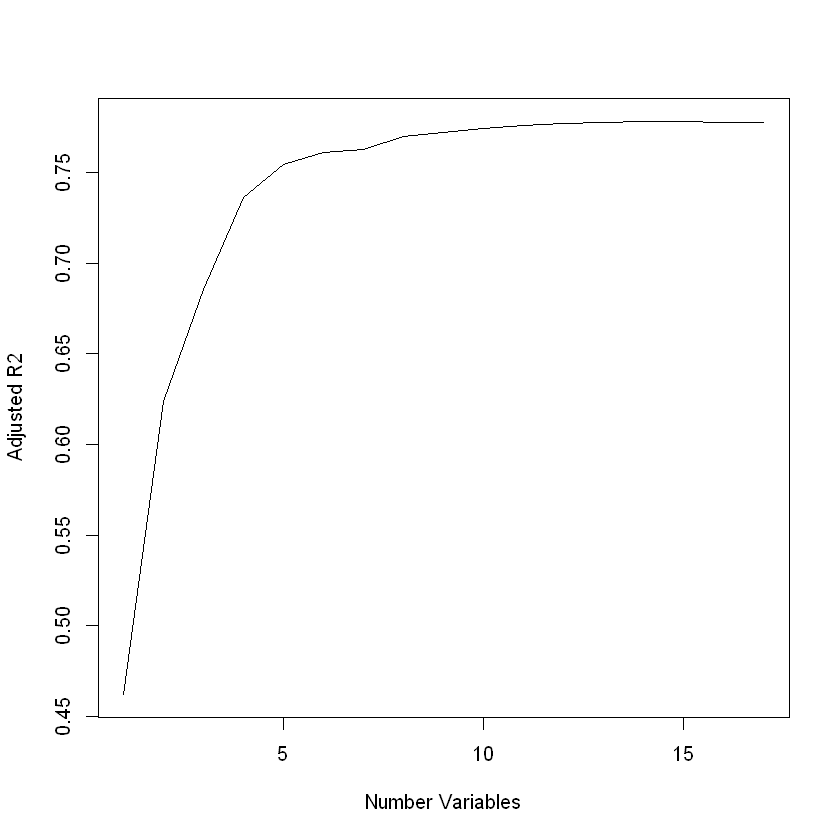

In [137]:
#par(mfrow = c(1, 3))

plot(reg_summary$cp, xlab = "Number Variables", ylab = "Cp", type = "l")
reg_summary$cp

plot(reg_summary$bic, xlab = "Number Variables", ylab = "BIC", type = "l")
reg_summary$bic

plot(reg_summary$adjr2, xlab = "Number Variables", ylab = "Adjusted R2",type = "l")
reg_summary$adjr2

In [139]:
#looks like we can select 7 
selected <- coef(reg_fit, id = 7)
names(selected)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "Personal"    "PhD"        
[6] "perc.alumni" "Expend"      "Grad.Rate"

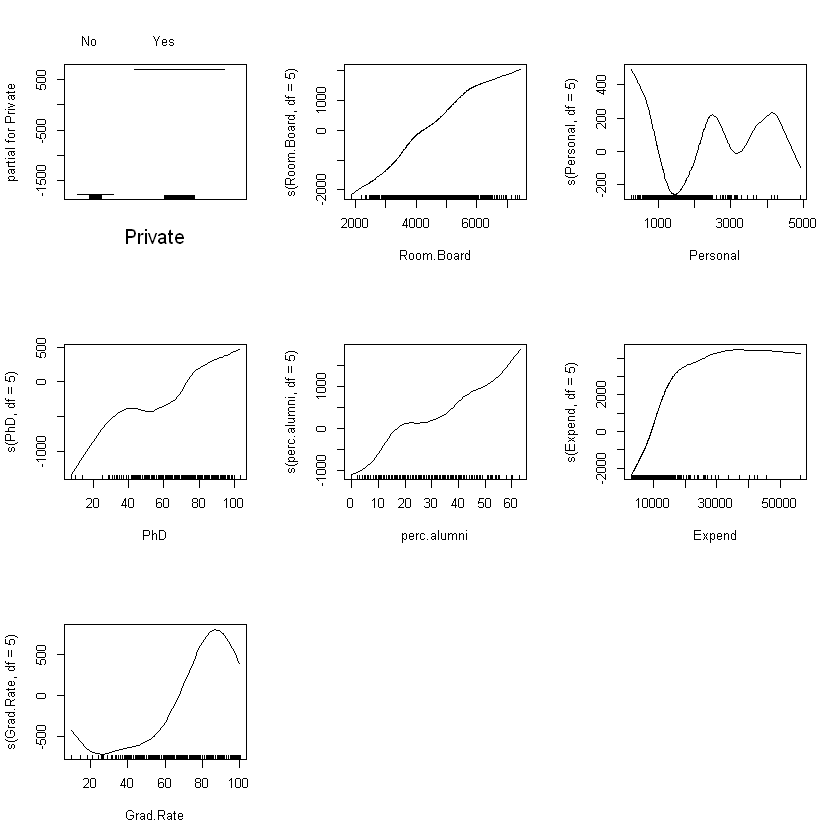

In [156]:
#b) #install.packages("gam")
library(gam)

gam_fit <- gam(Outstate ~ Private + s(Room.Board, df = 5) +  s(Personal, df = 5) + s(PhD, df = 5) + s(perc.alumni, df = 5) +
               s(Expend, df = 5) + s(Grad.Rate, df = 5), data = train)

par(mfrow=c(3,3))
plot(gam_fit)


In [157]:
#c)
gam_pred <- predict(gam_fit, test)
err<-mean((test$Outstate - gam_pred)^2)

In [158]:
tss = mean((test$Outstate - mean(test$Outstate))^2)
1 - err/tss

[1] 0.7482568

There is no improvement with the GAM model in relation with the OLS with 7 variables. The OLS showed an R squared of 0.76.

In [159]:
summary(gam_fit)


Call: gam(formula = Outstate ~ Private + s(Room.Board, df = 5) + s(Personal, 
    df = 5) + s(PhD, df = 5) + s(perc.alumni, df = 5) + s(Expend, 
    df = 5) + s(Grad.Rate, df = 5), data = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-6122.80 -1134.83    47.68  1205.12  4441.25 

(Dispersion Parameter for gaussian family taken to be 3250461)

    Null Deviance: 9447464234 on 581 degrees of freedom
Residual Deviance: 1787751532 on 549.9993 degrees of freedom
AIC: 10411.42 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq  F value    Pr(>F)    
Private                  1 2673997513 2673997513 822.6517 < 2.2e-16 ***
s(Room.Board, df = 5)    1 2024196109 2024196109 622.7411 < 2.2e-16 ***
s(Personal, df = 5)      1   24903250   24903250   7.6615  0.005831 ** 
s(PhD, df = 5)           1  555943706  555943706 171.0353 < 2.2e-16 ***
s(perc.alumni, df = 5)   1  356060138  356060138 109.5414 < 2.2e

If we see the anova for nonparametric effects, we can see that Personal, expend and grad rate show evidence of a non linear relationship.